In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pandas as pd
import geopandas as gpd

In [2]:
map_df = gpd.read_file('districtes.geojson').filter(items=['NOM', 'geometry'])
display(map_df)

,NOM,geometry
0,Ciutat Vella,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,Eixample,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ..."
2,Sants-Montjuïc,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,Les Corts,"POLYGON ((2.10342 41.40110, 2.10352 41.40109, ..."
4,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."
5,Gràcia,"POLYGON ((2.13629 41.42363, 2.13640 41.42358, ..."
6,Horta-Guinardó,"POLYGON ((2.15949 41.44977, 2.15942 41.44960, ..."
7,Nou Barris,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ..."
8,Sant Andreu,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
9,Sant Martí,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


In [3]:
unemployment_df = pd.read_csv('unemployment.csv')
unemployment_df = unemployment_df[(unemployment_df['Year'] == 2017) & (unemployment_df["Demand_occupation"] == "Registered unemployed") & (unemployment_df['Month'] == "December")]
unemployment_df = unemployment_df.groupby('District Name').sum().head(50)
unemployment_df = unemployment_df.filter(items=["Number"]).rename(columns={"Number": "unemployment"})
unemployment_df

,unemployment
District Name,
Ciutat Vella,6826
Eixample,9883
Gràcia,4781
Horta-Guinardó,7972
Les Corts,2823
No consta,7
Nou Barris,10065
Sant Andreu,7306
Sant Martí,11694


In [4]:
population = pd.read_csv('population.csv').filter(['Year', 'Number', 'District.Name'])
population = population[population['Year'] == 2017].groupby('District.Name').sum().drop('Year', axis=1).rename(columns={"Number": "population"})
population = population.join(unemployment_df)
population['percentage'] = population['unemployment'] / population['population'] * 100

map_df = map_df.set_index('NOM').join(population)
map_df

,geometry,population,unemployment,percentage
NOM,,,,
Ciutat Vella,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...",101387,6826,6.732619
Eixample,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ...",266416,9883,3.709612
Sants-Montjuïc,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3...",181910,8883,4.883184
Les Corts,"POLYGON ((2.10342 41.40110, 2.10352 41.40109, ...",82033,2823,3.441298
Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4...",149279,3512,2.352642
Gràcia,"POLYGON ((2.13629 41.42363, 2.13640 41.42358, ...",121347,4781,3.939941
Horta-Guinardó,"POLYGON ((2.15949 41.44977, 2.15942 41.44960, ...",168751,7972,4.724120
Nou Barris,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ...",166579,10065,6.042178
Sant Andreu,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ...",147594,7306,4.950066


Text(0.5, 1.0, 'Unemployment rate in Barcelona per district in 2017 as percentage of the population')

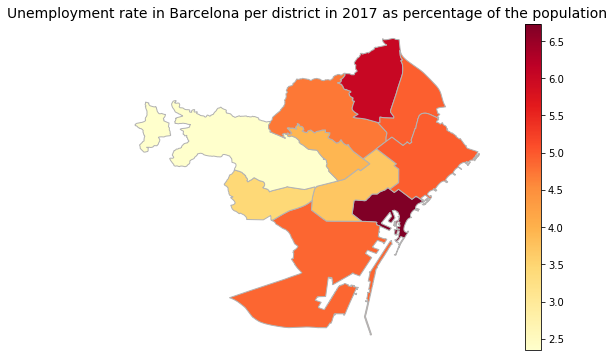

In [5]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'percentage'

# set the range for the choropleth
vmin, vmax = 0, 10

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
ax.axis('off')
map_df.plot(column='percentage', ax=ax, legend=True, cmap='YlOrRd', edgecolor='.7')
ax.set_title('Unemployment rate in Barcelona per district in 2017 as percentage of the population', fontdict={'fontsize': '14', 'fontweight' : '3'})



In [9]:
order = ['Barcelona - Ciutadella', 'Barcelona - Poblenou', 'Barcelona - Eixample', 'Barcelona - Gràcia', 'Barcelona - Palau Reial', 'Barcelona - Vall Hebron', 'Barcelona - Observ Fabra']
air_quality_df = pd.read_csv('datasets_71509_948751_air_quality_Nov2017.csv').filter(['Station', 'O3 Value', 'NO2 Value', 'PM10 Value']).fillna(method='ffill')
air_quality_df = air_quality_df.groupby('Station').mean().reindex(order)
air_quality_df

,O3 Value,NO2 Value,PM10 Value
Station,,,
Barcelona - Ciutadella,25.200557,39.984680,21.066852
Barcelona - Poblenou,31.961003,40.444290,20.055710
Barcelona - Eixample,21.655989,53.717270,22.781337
Barcelona - Gràcia,26.274373,45.593315,21.066852
Barcelona - Palau Reial,31.961003,28.454039,14.721448
Barcelona - Vall Hebron,36.403900,30.849582,14.728412
Barcelona - Observ Fabra,64.207521,12.271588,10.941504


In [12]:
# Create figure
fig = go.Figure()

fig.add_trace(go.Bar(x=list(air_quality_df.index), y=list(air_quality_df['PM10 Value']),
                        name = 'PM10 air value'))

fig.add_trace(go.Bar(x=list(air_quality_df.index), y=list(air_quality_df['NO2 Value']),
                        name = 'NO2 air value'))

fig.add_trace(go.Bar(x=list(air_quality_df.index), y=list(air_quality_df['O3 Value']),
                        name = 'O3 air value'))

updatemenus = list([
    dict(active=-1,
        buttons=list([
            dict(label= 'PM10 air value',
                method = 'update',
                args = [{'visible': [False, True, False]},
                       {'title' : 'PM10 air value'}]), 
            dict(label = 'NO2 air value',
                method = 'update',
                args = [{'visible' : [True, False, False]},
                       {'title' : 'NO2 air value'}]),
            dict(label = 'O3 air value',
                method = 'update',
                args = [{'visible' : [False, False, True]},
                       {'title' : 'O3 air value'}]),
        ]),
    )
])

fig.update_layout(dict(yaxis_title = 'Value',
                xaxis_title =  'Meetstations van Barcelona, van dichtbij tot ver van de zee',
                showlegend = False,
                title = 'Values of NO2, PM10 and O3',
                updatemenus=updatemenus))

fig.show()
